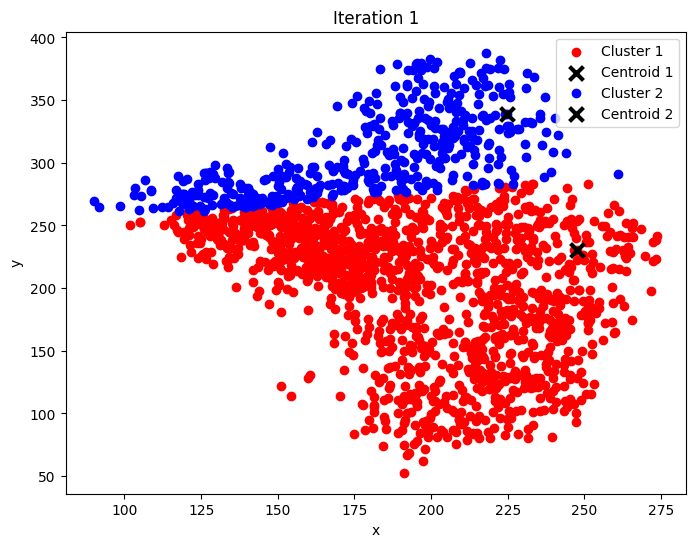

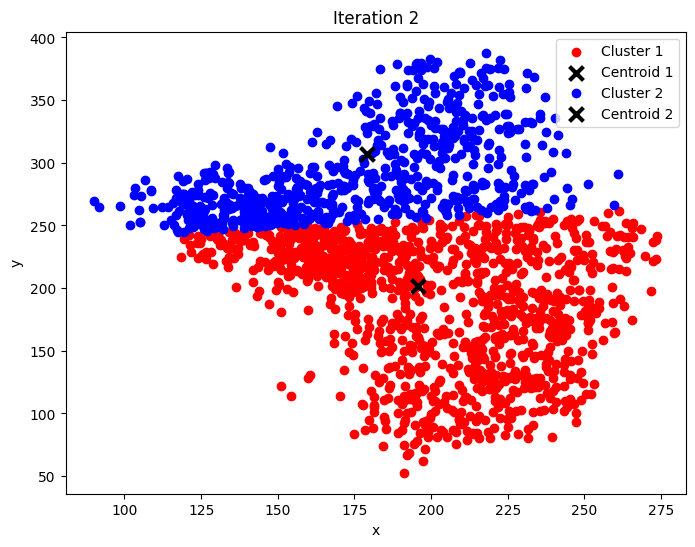

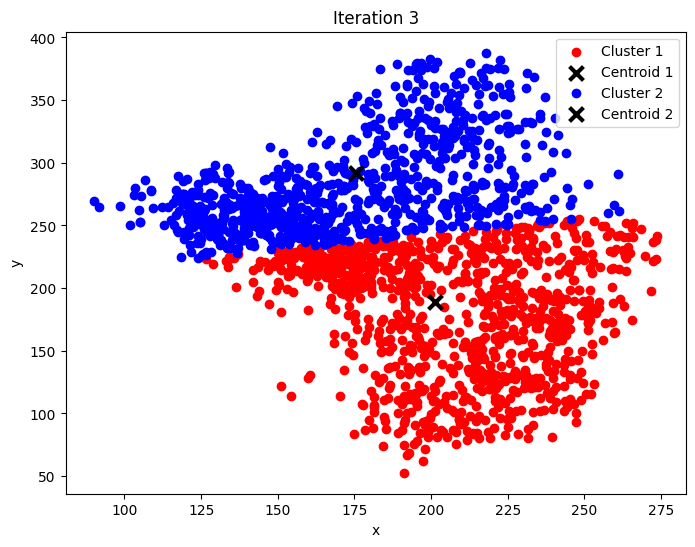

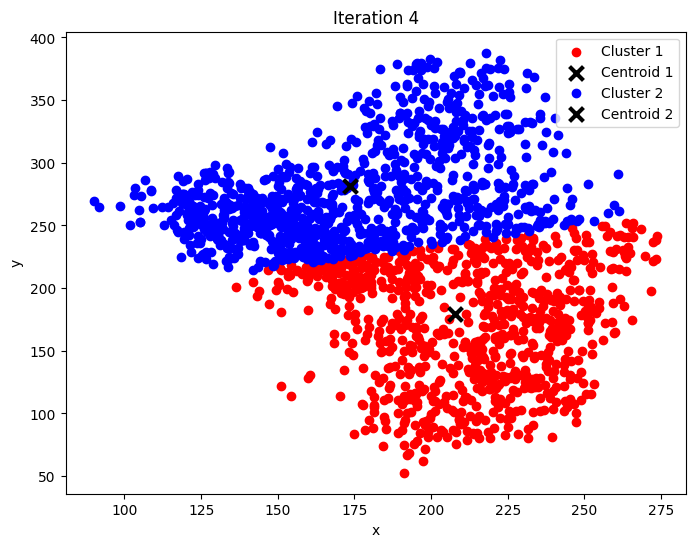

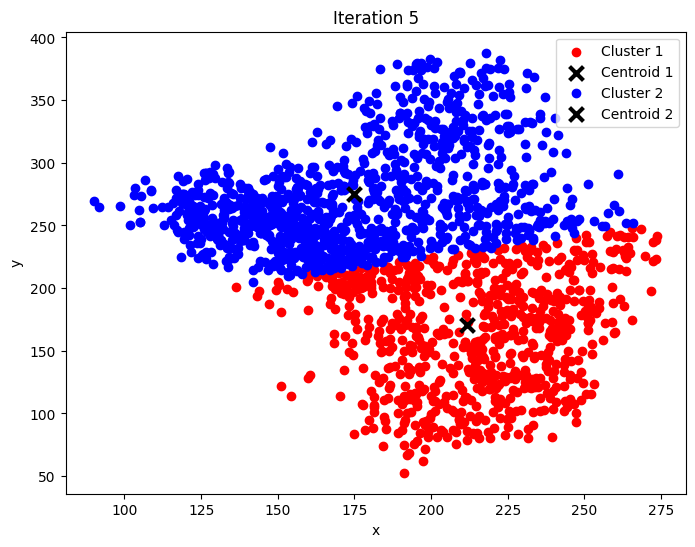

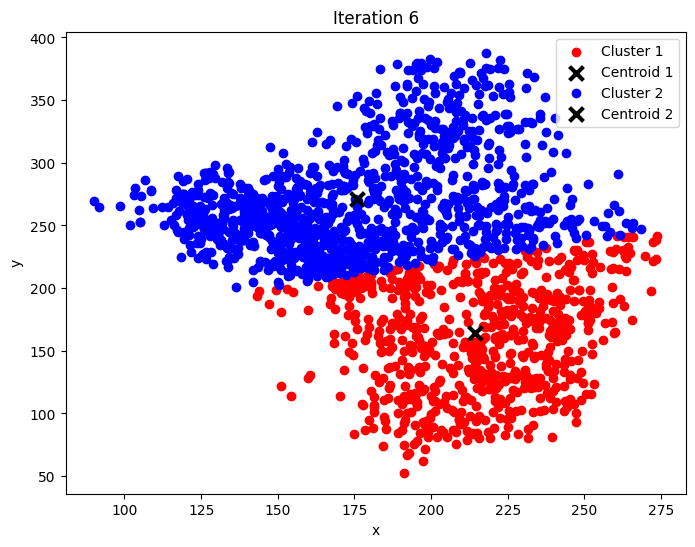

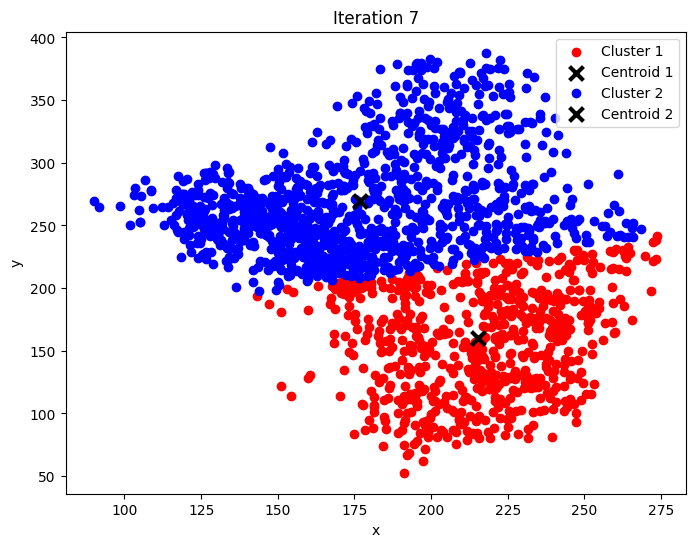

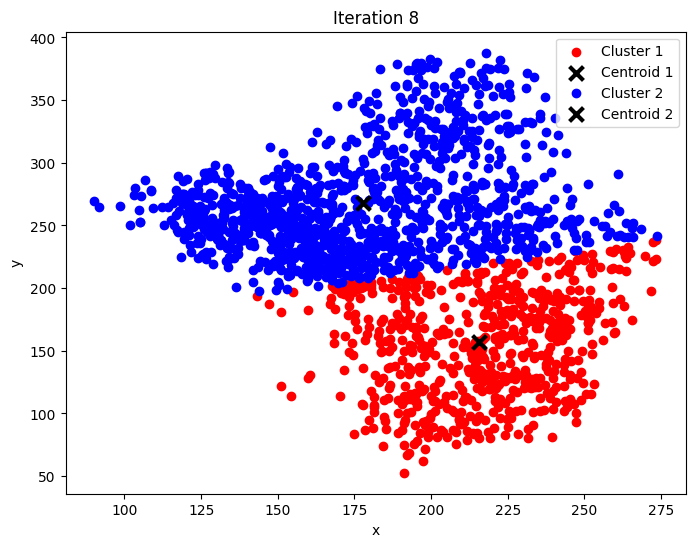

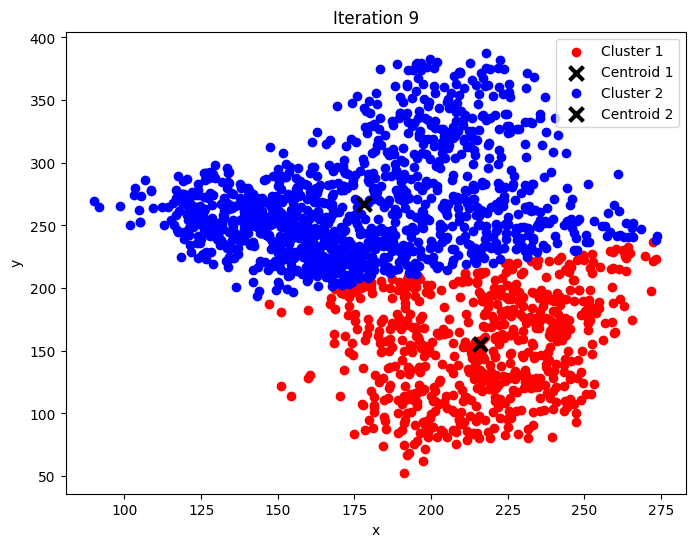

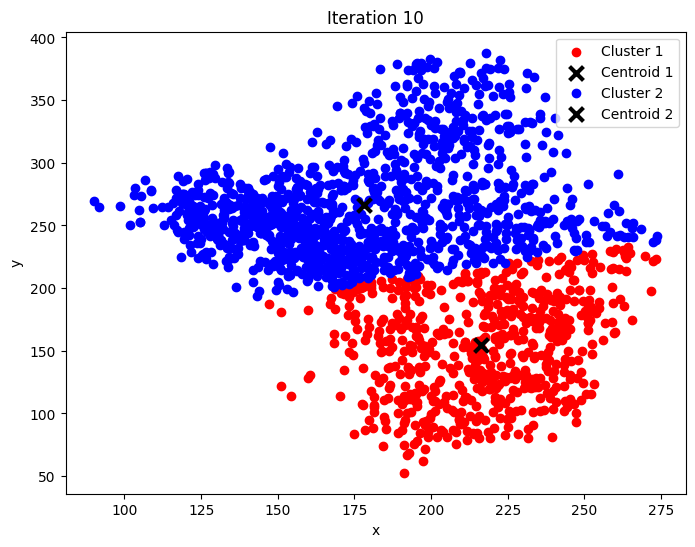

In [7]:
#Task01
import pandas as pd
df = pd.read_csv("hyperplane.csv")
df.head()
import numpy as np
import matplotlib.pyplot as plt
X = df[['x', 'y']].values
K = 2 #Setting clustoroids as 2
epochs = 10 #and setting iterations through the dataset as 10
#now selecting centroids as randomly from the dataset
centroids = X[np.random.choice(range(len(X)), K, replace=False)]
for epoch in range(epochs):
    # Step 2.1: Assign each point to the closest centroid
    clusters = [[] for _ in range(K)]
    for point in X:
        distances = [np.sqrt(np.sum((point - centroid) ** 2)) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters[closest_centroid].append(point)

    # Step 2.2: Calculate new centroids as the mean of each cluster
    new_centroids = []
    for cluster in clusters:
        new_centroid = np.mean(cluster, axis=0) if cluster else centroids[clusters.index(cluster)]
        new_centroids.append(new_centroid)
    new_centroids = np.array(new_centroids)

    # Step 2.3: Plot clusters and centroids
    plt.figure(figsize=(8, 6))
    colors = ['r', 'b']
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {i+1}')
        plt.scatter(centroids[i][0], centroids[i][1], color='black', marker='x', s=100, linewidths=3, label=f'Centroid {i+1}')

    plt.title(f"Iteration {epoch + 1}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

    # Step 2.4: Update centroids for the next iteration
    centroids = new_centroids

Clustering with K = 3


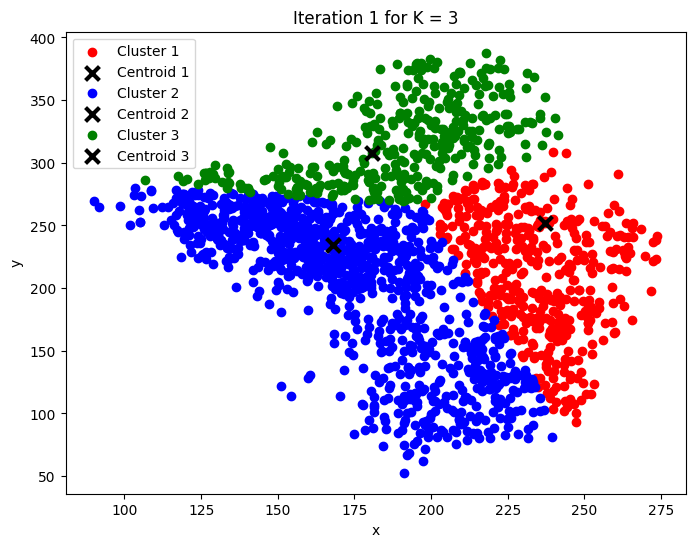

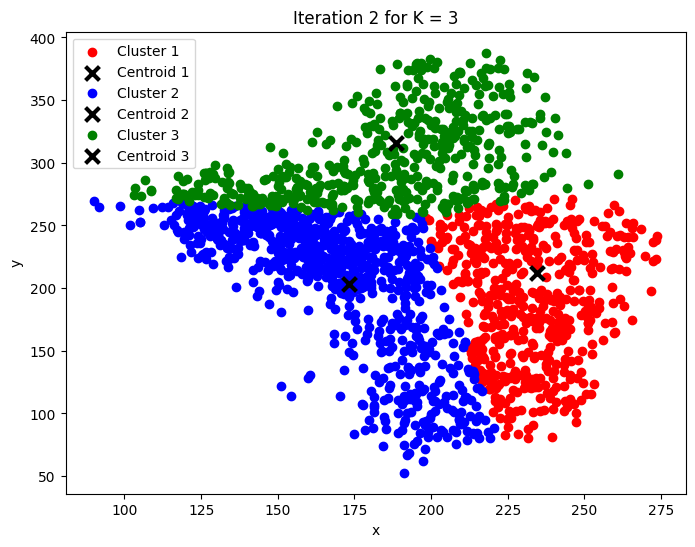

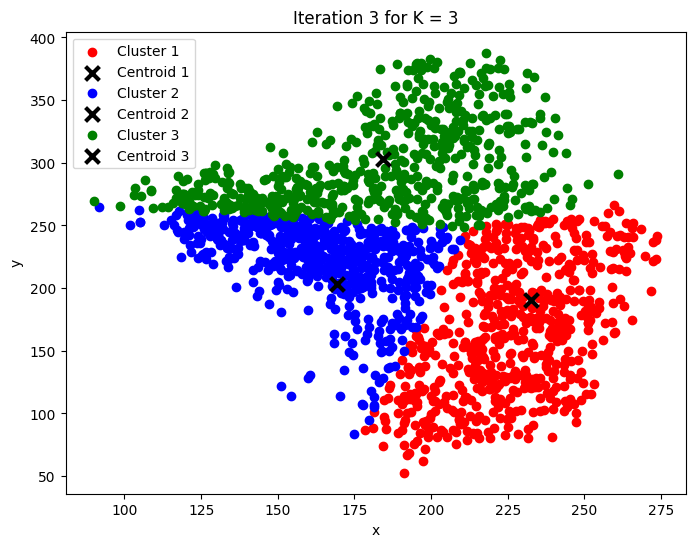

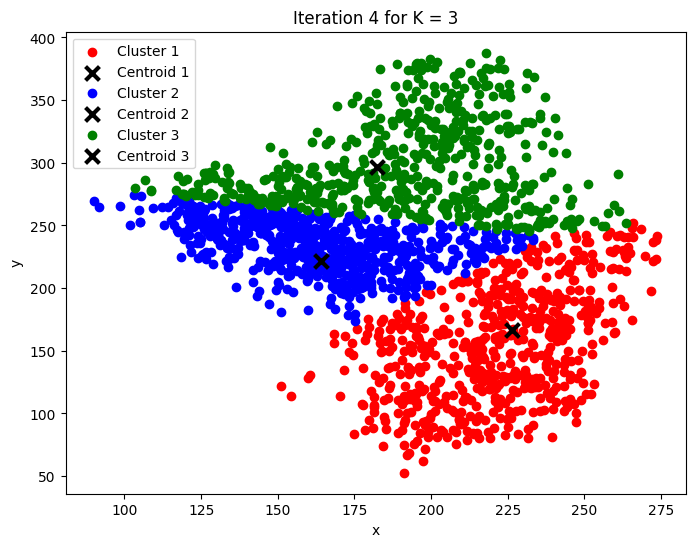

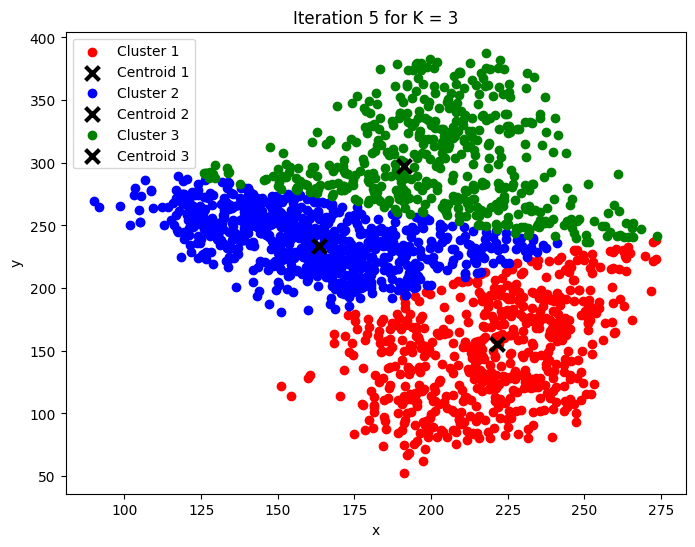

Clustering with K = 4


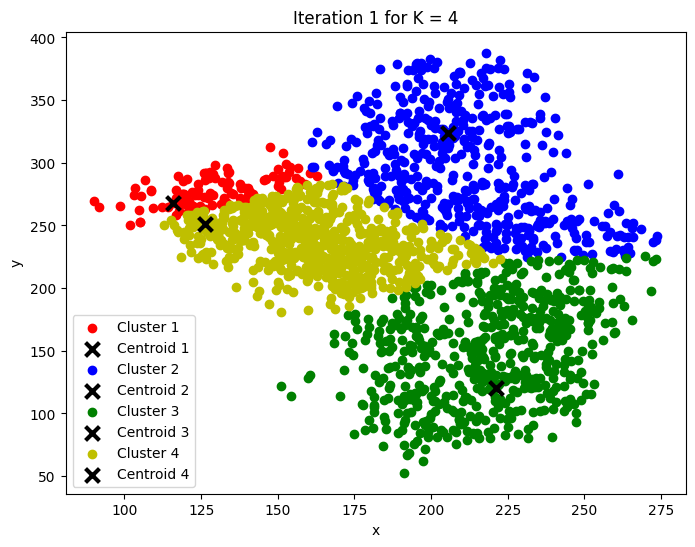

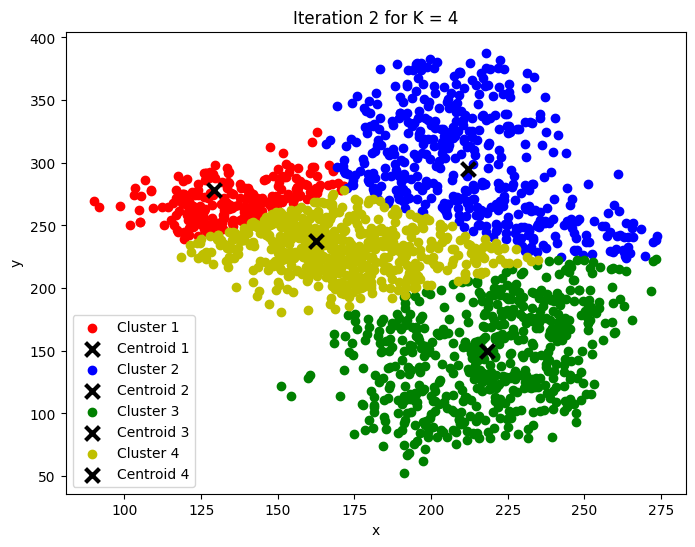

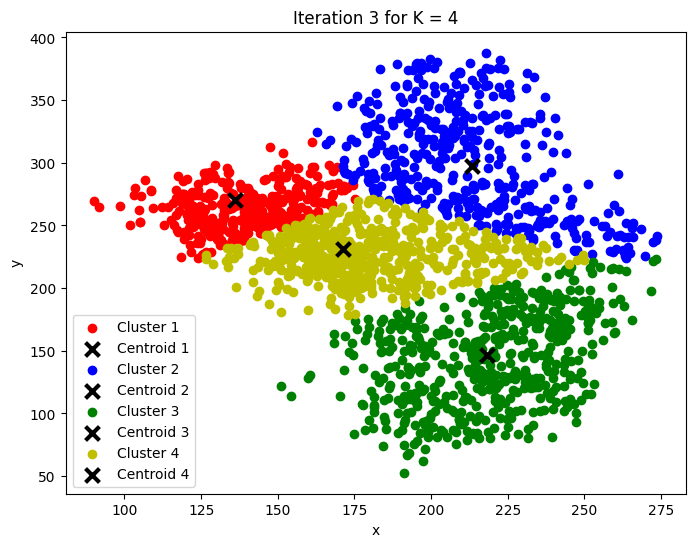

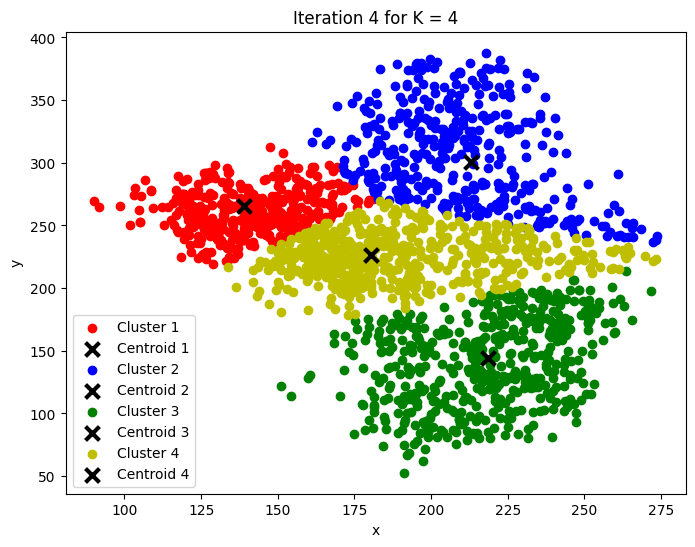

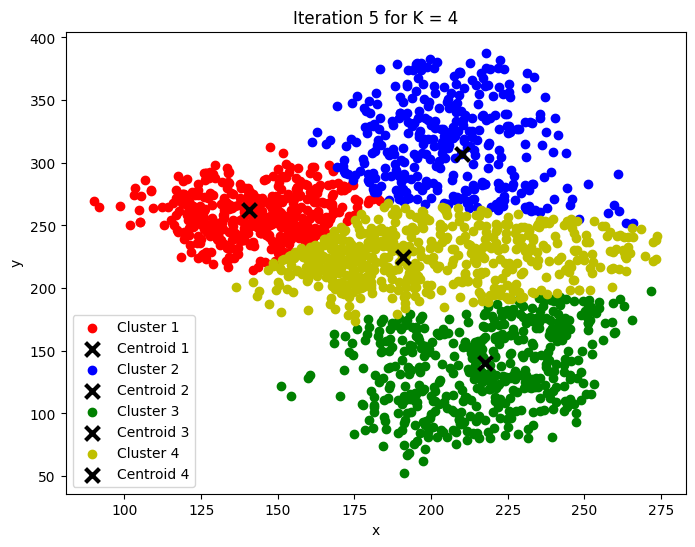

Clustering with K = 5


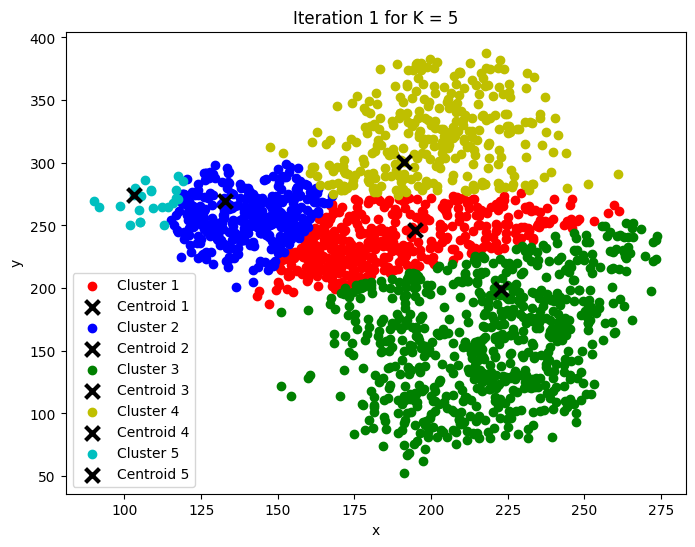

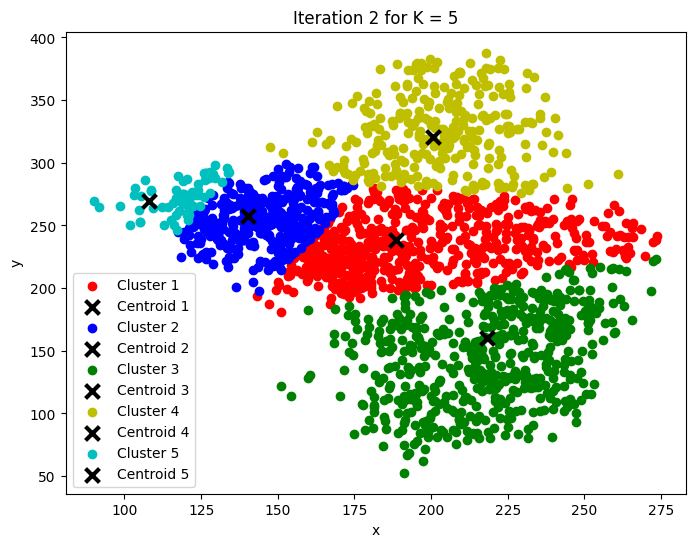

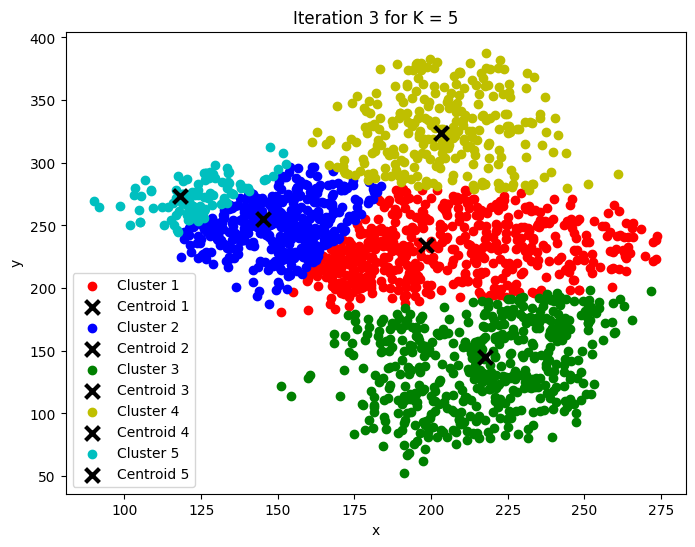

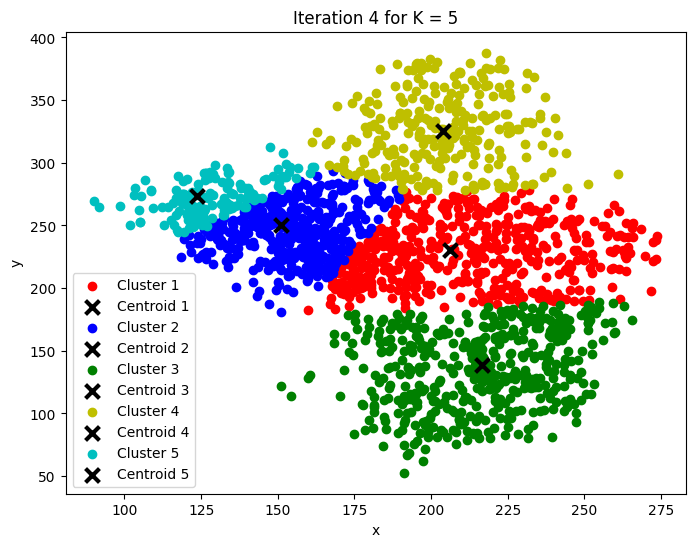

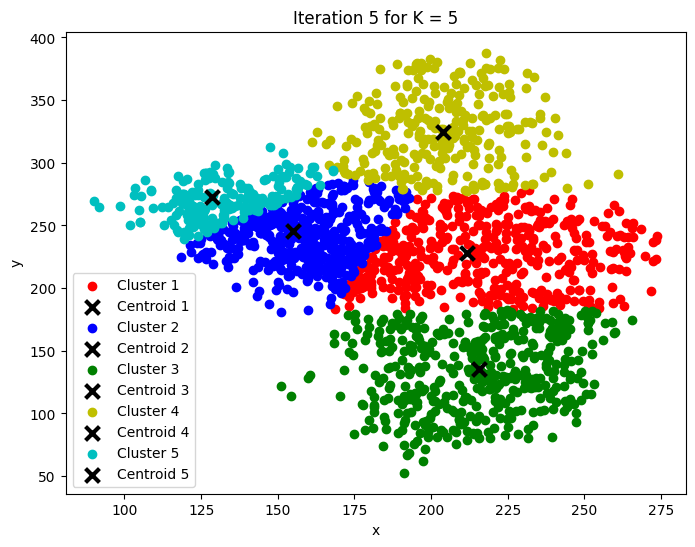

In [8]:
# Load the data
import pandas as pd
df = pd.read_csv("hyperplane.csv")

import numpy as np
import matplotlib.pyplot as plt

# Extract the 'x' and 'y' columns to use as our features
X = df[['x', 'y']].values

# Set the number of epochs (iterations) to 5 for each value of K
epochs = 5

# Loop over each K value we want to test
for K in [3, 4, 5]:
    print(f"Clustering with K = {K}")

    # Step 1: Randomly pick K data points from X as our initial centroids
    centroids = X[np.random.choice(range(len(X)), K, replace=False)]

    # Step 2: Start clustering, repeating for the specified number of epochs
    for epoch in range(epochs):
        # Create a list of clusters, one for each centroid
        clusters = [[] for _ in range(K)]

        # Step 2.1: Assign each point to the closest centroid
        # For each data point, calculate its distance to each centroid, then assign it to the nearest one
        for point in X:
            distances = [np.sqrt(np.sum((point - centroid) ** 2)) for centroid in centroids]
            closest_centroid = np.argmin(distances)  # Index of the nearest centroid
            clusters[closest_centroid].append(point)

        # Step 2.2: Recalculate centroids by averaging the points in each cluster
        new_centroids = []
        for cluster in clusters:
            # Calculate the mean position of each cluster (i.e., the new centroid)
            new_centroid = np.mean(cluster, axis=0) if cluster else centroids[clusters.index(cluster)]
            new_centroids.append(new_centroid)
        new_centroids = np.array(new_centroids)

        # Step 2.3: Plot the clusters and centroids to visualize each iteration
        plt.figure(figsize=(8, 6))
        colors = ['r', 'b', 'g', 'y', 'c']  # Colors for different clusters
        for i, cluster in enumerate(clusters):
            cluster = np.array(cluster)
            if len(cluster) > 0:  # Plot only if the cluster has points
                plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % len(colors)], label=f'Cluster {i+1}')
            plt.scatter(centroids[i][0], centroids[i][1], color='black', marker='x', s=100, linewidths=3, label=f'Centroid {i+1}')

        plt.title(f"Iteration {epoch + 1} for K = {K}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()

        # Update centroids for the next iteration
        centroids = new_centroids



Running K-Means for K = 2


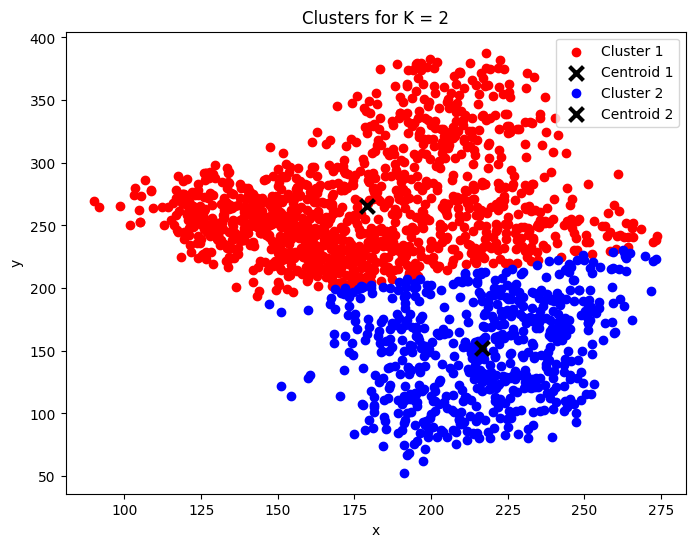

Running K-Means for K = 3


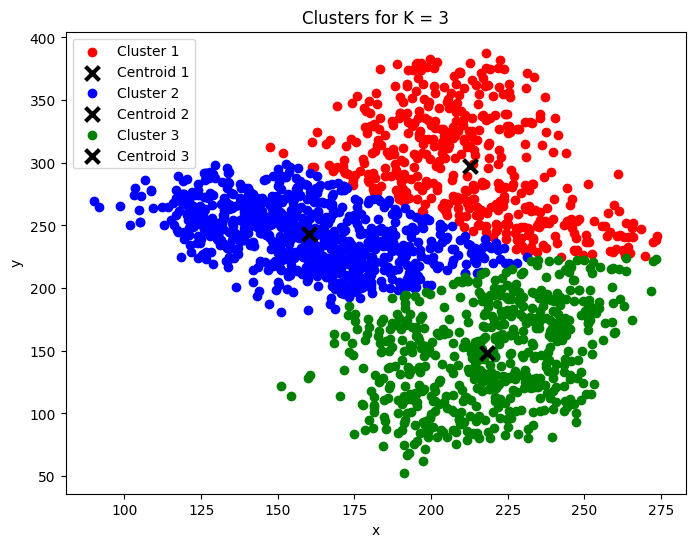

Running K-Means for K = 4


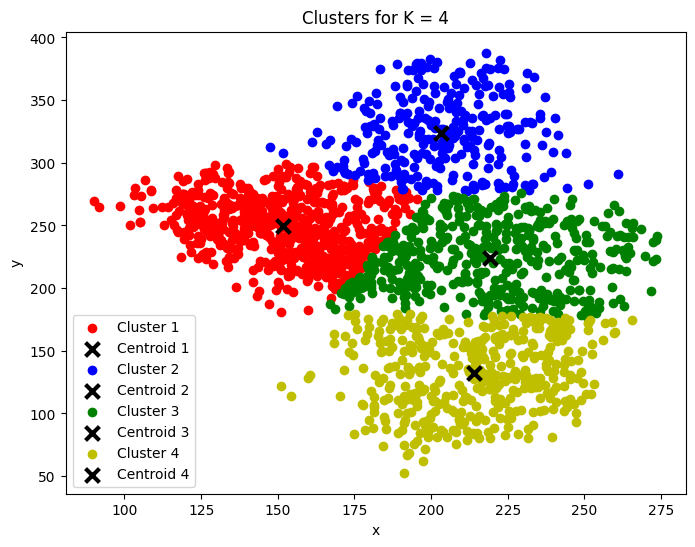

Running K-Means for K = 5


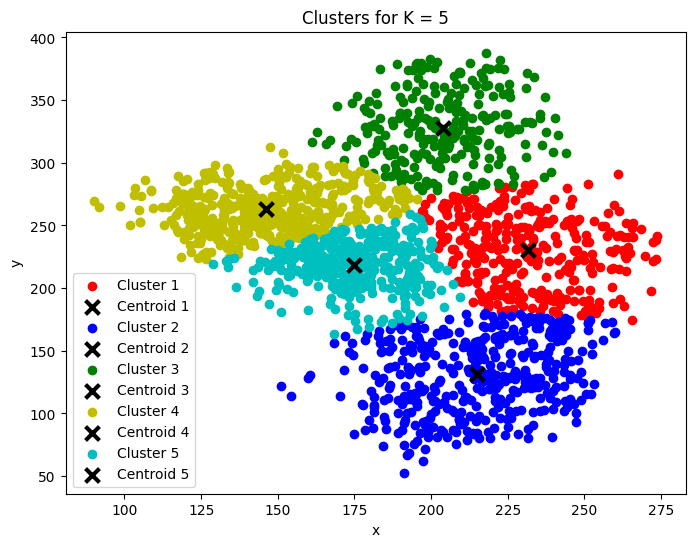

Running K-Means for K = 6


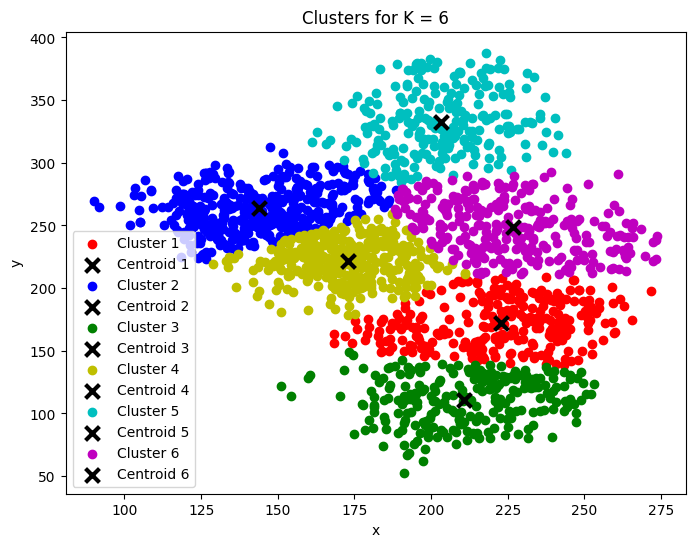

Running K-Means for K = 7


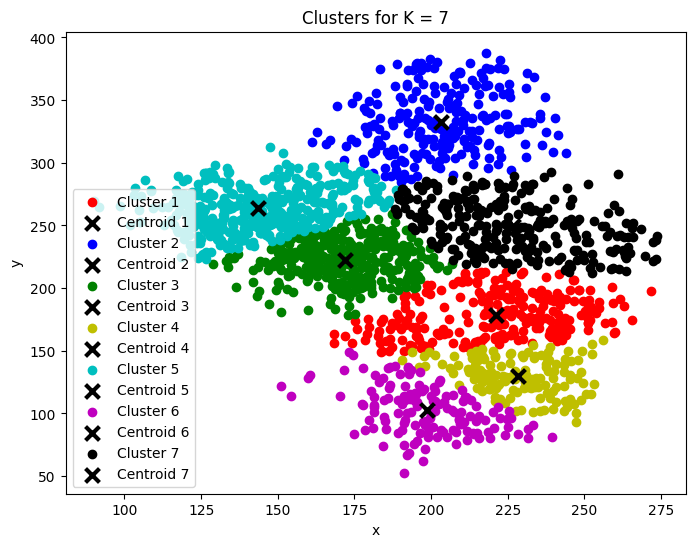

Running K-Means for K = 8


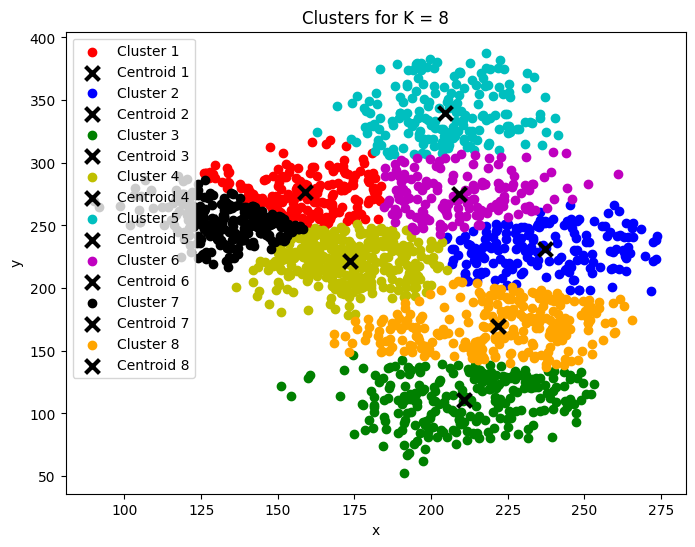

Running K-Means for K = 9


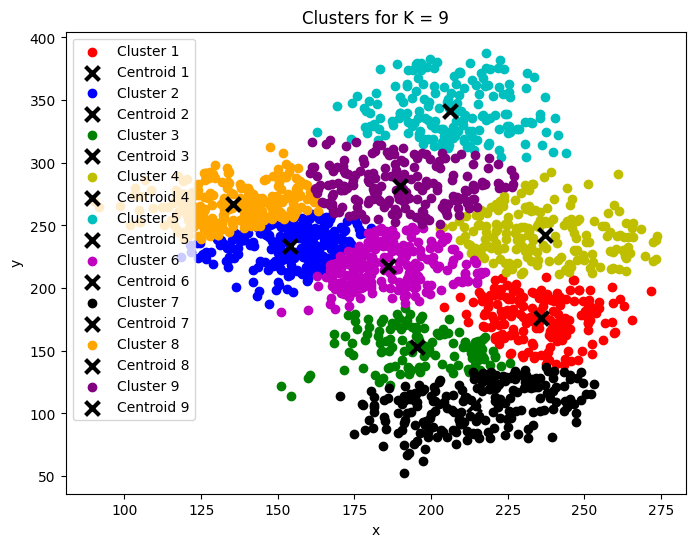

Running K-Means for K = 10


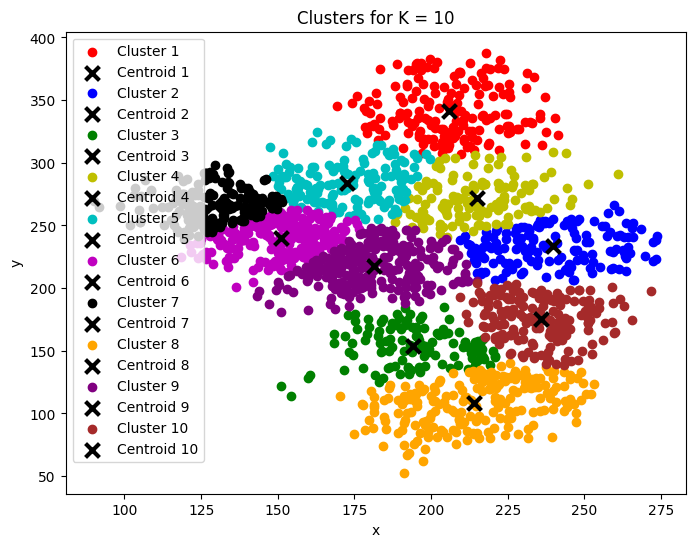

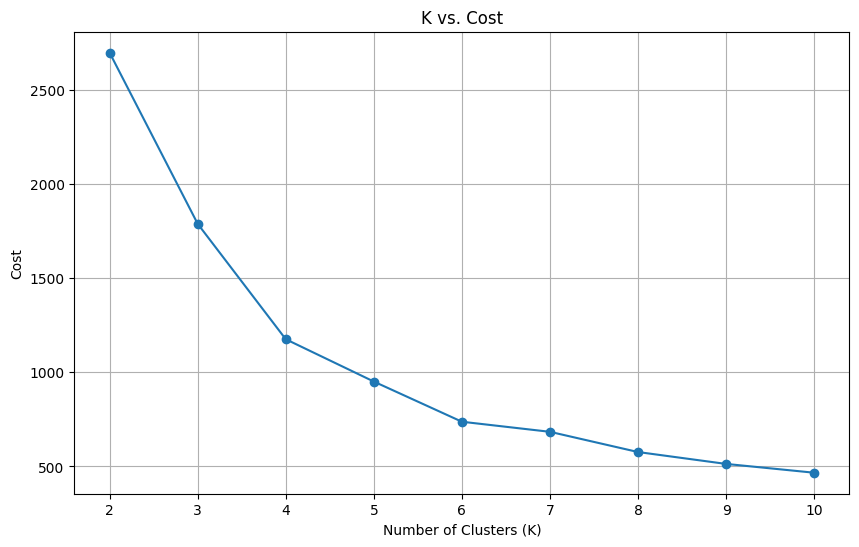

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("hyperplane.csv")
X = df[['x', 'y']].values

# Define the maximum number of clusters and number of epochs
max_K = 10
epochs = 20

# Initialize an empty list to store the cost for each K
costs = []

# Loop over each K value from 2 to 10
for K in range(2, max_K + 1):
    print(f"Running K-Means for K = {K}")

    # Step 1: Randomly initialize K centroids
    centroids = X[np.random.choice(range(len(X)), K, replace=False)]

    # Step 2: Run the K-Means algorithm for the specified number of epochs
    for epoch in range(epochs):
        # Create a list to hold the clusters
        clusters = [[] for _ in range(K)]

        # Assign each data point to the nearest centroid
        for point in X:
            distances = [np.sqrt(np.sum((point - centroid) ** 2)) for centroid in centroids]
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(point)

        # Update the centroids to the mean of their assigned points
        new_centroids = []
        for cluster in clusters:
            new_centroid = np.mean(cluster, axis=0) if cluster else centroids[clusters.index(cluster)]
            new_centroids.append(new_centroid)
        centroids = np.array(new_centroids)

    # Calculate the cost for this K after the last iteration
    cost = 0
    m = len(X)
    for i, cluster in enumerate(clusters):
        for point in cluster:
            cost += np.sum((point - centroids[i]) ** 2)
    cost /= m
    costs.append(cost)

    # Plot the clusters at the last iteration for this K
    plt.figure(figsize=(8, 6))
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'orange', 'purple', 'brown']  # Add more colors if needed
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % len(colors)], label=f'Cluster {i+1}')
        plt.scatter(centroids[i][0], centroids[i][1], color='black', marker='x', s=100, linewidths=3, label=f'Centroid {i+1}')

    plt.title(f"Clusters for K = {K}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Plot the cost as a function of K
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_K + 1), costs, marker='o')
plt.title("K vs. Cost")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cost")
plt.xticks(range(2, max_K + 1))
plt.grid(True)
plt.show()

Running K-Means for K = 2


<ipython-input-12-b90f6c5a3950>:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', K)


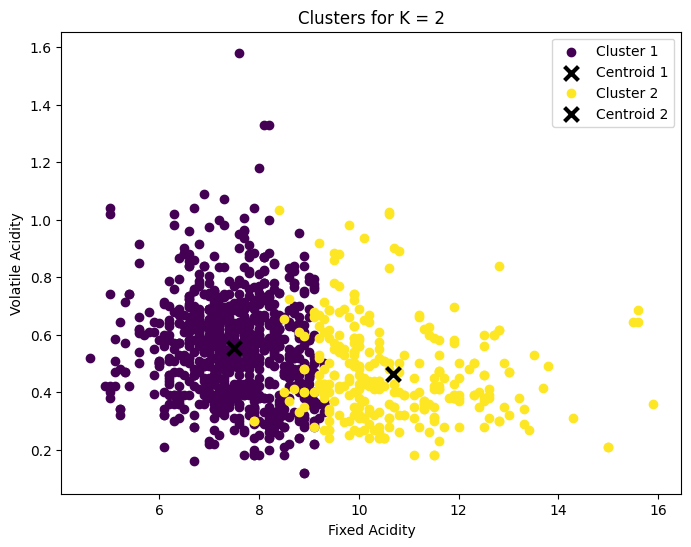

Running K-Means for K = 3


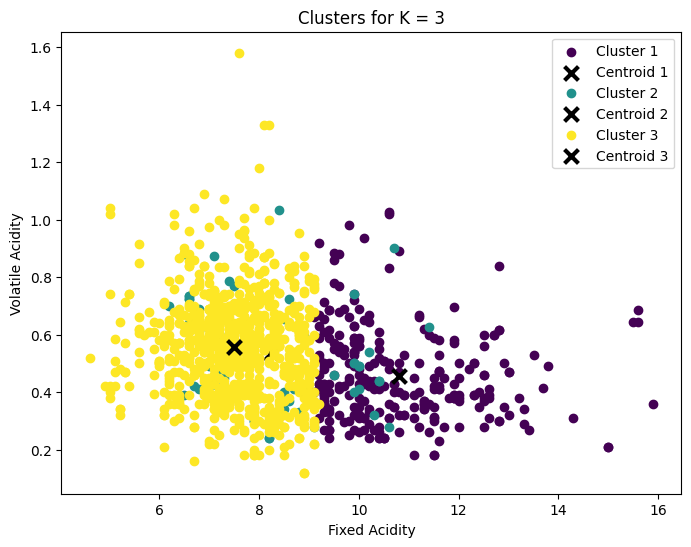

Running K-Means for K = 4


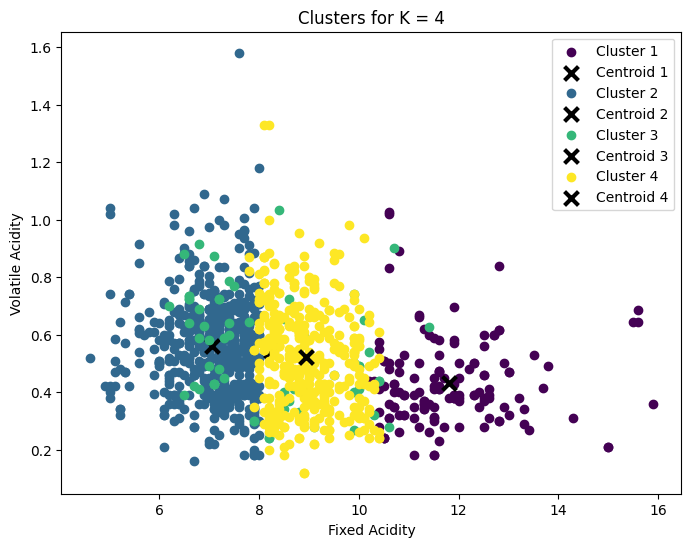

Running K-Means for K = 5


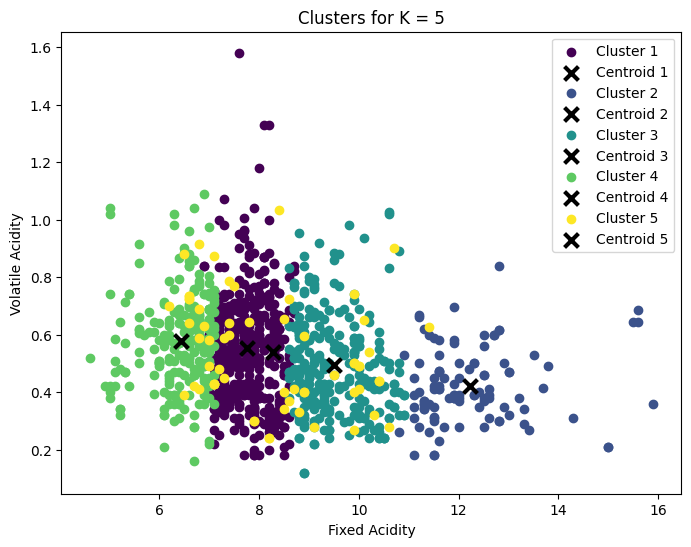

Running K-Means for K = 6


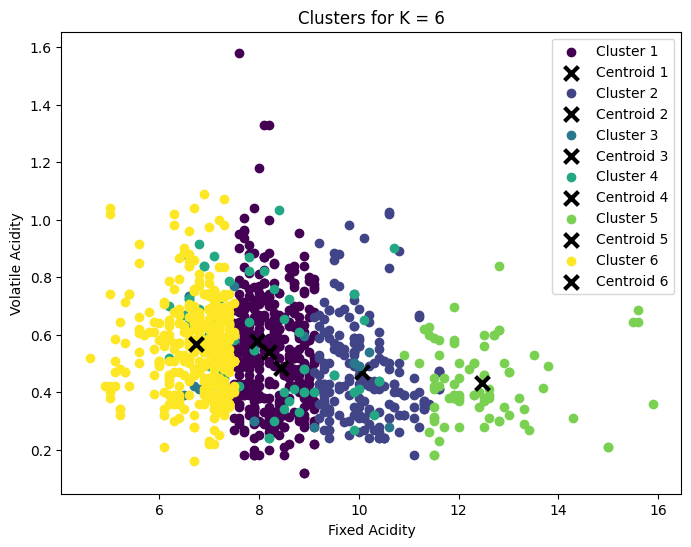

Running K-Means for K = 7


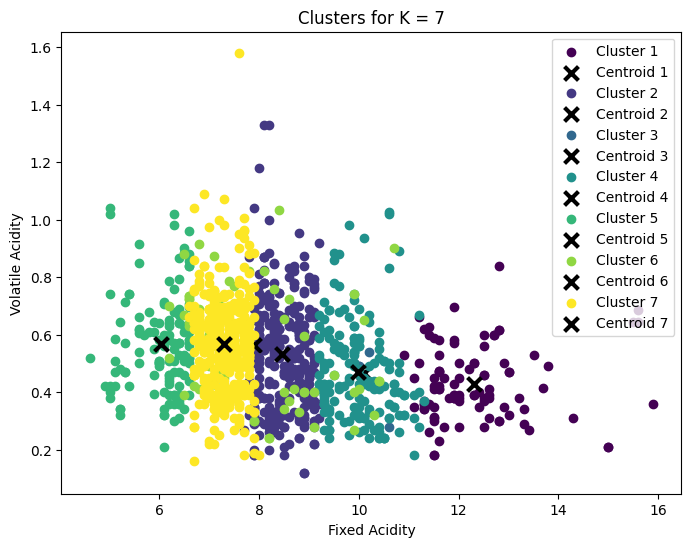

Running K-Means for K = 8


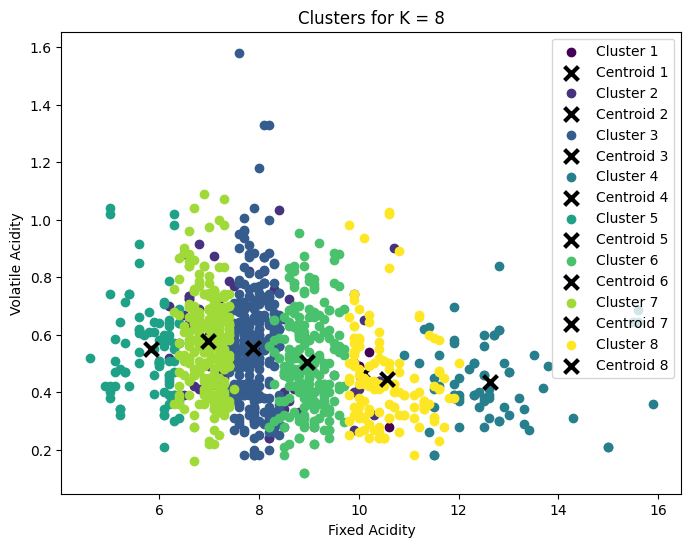

Running K-Means for K = 9


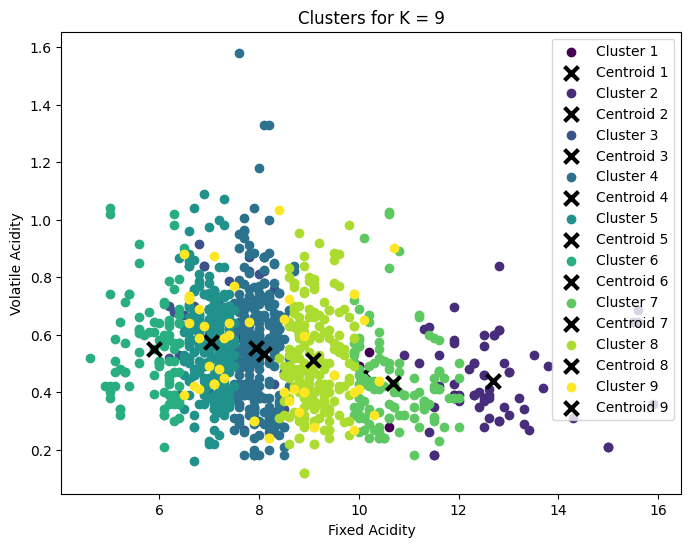

Running K-Means for K = 10


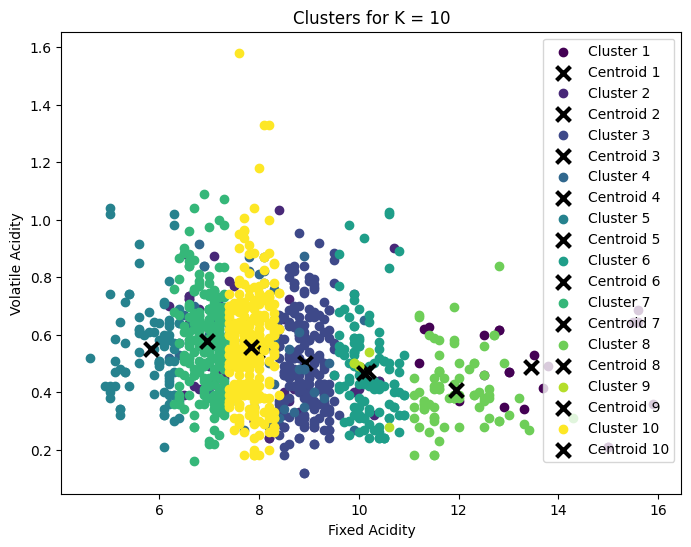

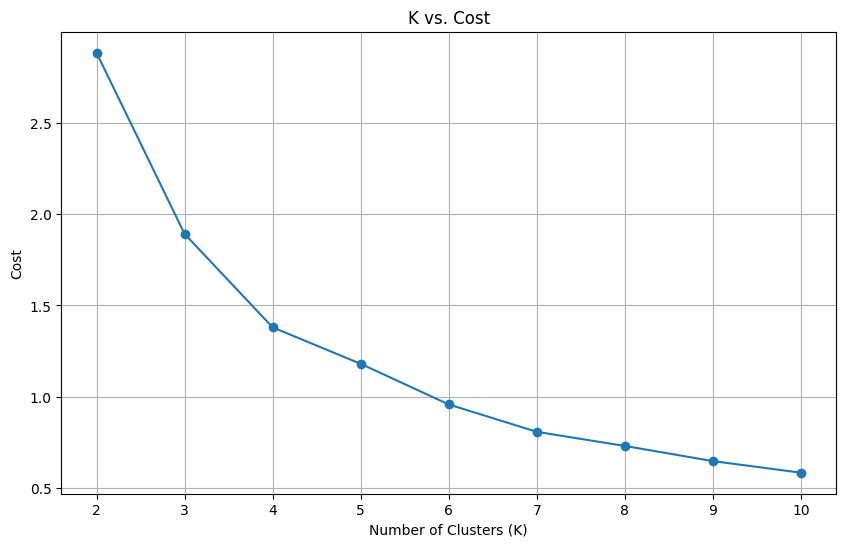

In [12]:
#Task04
#using wine quality dataset downloaded from kaggle.com named WineQT
import pandas as pd
df = pd.read_csv("WineQT.csv")
df.head()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']].values

# Define the maximum number of clusters and number of epochs
max_K = 10
epochs = 20

# Initialize an empty list to store the cost for each K (optional)
costs = []

# Loop over each K value from 2 to 10
for K in range(2, max_K + 1):
    print(f"Running K-Means for K = {K}")

    # Step 1: Randomly initialize K centroids
    centroids = X[np.random.choice(range(len(X)), K, replace=False)]

    # Step 2: Run the K-Means algorithm for the specified number of epochs
    for epoch in range(epochs):
        # Create a list to hold the clusters
        clusters = [[] for _ in range(K)]

        # Assign each data point to the nearest centroid
        for point in X:
            distances = [np.sqrt(np.sum((point - centroid) ** 2)) for centroid in centroids]
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(point)

        # Update the centroids to the mean of their assigned points
        new_centroids = []
        for cluster in clusters:
            new_centroid = np.mean(cluster, axis=0) if cluster else centroids[clusters.index(cluster)]
            new_centroids.append(new_centroid)
        centroids = np.array(new_centroids)

    # Calculate the cost for this K after the last iteration (optional)
    cost = 0
    m = len(X)
    for i, cluster in enumerate(clusters):
        for point in cluster:
            cost += np.sum((point - centroids[i]) ** 2)
    cost /= m
    costs.append(cost)

    # Plot the clusters at the last iteration for this K
    plt.figure(figsize=(8, 6))
    colors = plt.cm.get_cmap('viridis', K)
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            plt.scatter(cluster[:, 0], cluster[:, 1], color=colors(i), label=f'Cluster {i+1}')
        plt.scatter(centroids[i][0], centroids[i][1], color='black', marker='x', s=100, linewidths=3, label=f'Centroid {i+1}')

    plt.title(f"Clusters for K = {K}")
    plt.xlabel("Fixed Acidity")
    plt.ylabel("Volatile Acidity")
    plt.legend()
    plt.show()

# Plot the cost as a function of K
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_K + 1), costs, marker='o')
plt.title("K vs. Cost")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cost")
plt.xticks(range(2, max_K + 1))
plt.grid(True)
plt.show()